<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/revision_l3v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import fastai
from fastai.vision import *

In [ ]:
path = untar_data(URLs.PLANET_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/planet_sample/labels.csv'),
 PosixPath('/root/.fastai/data/planet_sample/train')]

In [ ]:
df = pd.read_csv(path/'labels.csv')

In [ ]:
df.head()

,image_name,tags
0,train_21983,partly_cloudy primary
1,train_9516,clear cultivation primary water
2,train_12664,haze primary
3,train_36960,clear primary
4,train_5302,haze primary road


In [ ]:
(path/'train').ls()[:10]

[PosixPath('/root/.fastai/data/planet_sample/train/train_24396.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_33002.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_19080.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_31329.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_27156.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_8149.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_14909.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_8119.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_16856.jpg'),
 PosixPath('/root/.fastai/data/planet_sample/train/train_3410.jpg')]

In [ ]:
src = ImageList.from_df(df, path = path/'train', suffix='.jpg').split_by_rand_pct(0.1).label_from_df(cols = 'tags', label_delim = ' ')

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
#test
# len(src.train.x)
img_data = src.train.x[0].data
img_data, img_data.shape

(tensor([[[0.3451, 0.3137, 0.2980,  ..., 0.3490, 0.3373, 0.3333],
          [0.3373, 0.3098, 0.3059,  ..., 0.3765, 0.3608, 0.3490],
          [0.3451, 0.3255, 0.3255,  ..., 0.4196, 0.3961, 0.3765],
          ...,
          [0.7608, 0.7608, 0.7608,  ..., 0.2588, 0.2902, 0.3294],
          [0.7608, 0.7608, 0.7608,  ..., 0.2667, 0.2745, 0.2863],
          [0.7608, 0.7608, 0.7608,  ..., 0.2745, 0.2588, 0.2392]],
 
         [[0.3608, 0.3294, 0.3176,  ..., 0.3686, 0.3490, 0.3412],
          [0.3608, 0.3333, 0.3255,  ..., 0.3961, 0.3765, 0.3608],
          [0.3647, 0.3451, 0.3412,  ..., 0.4353, 0.4118, 0.3922],
          ...,
          [0.7333, 0.7333, 0.7333,  ..., 0.3020, 0.3059, 0.3137],
          [0.7333, 0.7333, 0.7333,  ..., 0.2941, 0.2980, 0.3059],
          [0.7294, 0.7294, 0.7333,  ..., 0.2902, 0.2941, 0.2980]],
 
         [[0.2471, 0.2431, 0.2510,  ..., 0.2706, 0.2549, 0.2471],
          [0.2588, 0.2549, 0.2588,  ..., 0.2980, 0.2784, 0.2667],
          [0.2706, 0.2667, 0.2667,  ...,

In [ ]:
tfms = get_transforms(flip_vert=True, max_warp=0. )
data = src.transform(tfms, size = 128).databunch(bs = 32).normalize(imagenet_stats)

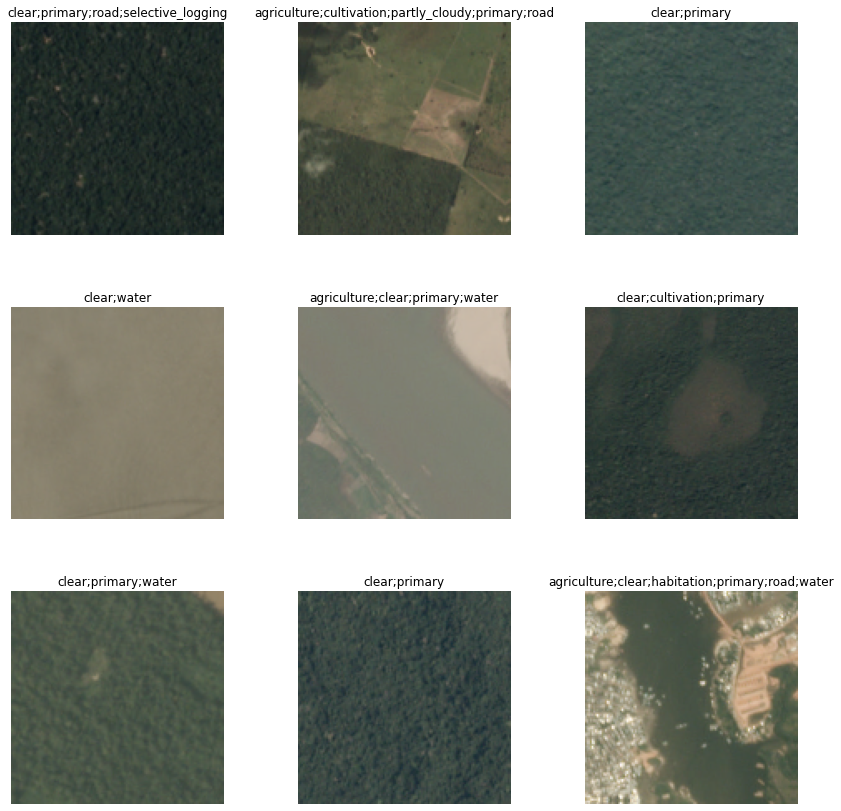

In [ ]:
data.show_batch(rows = 3)

In [ ]:
#test
for i in data.train_dl:
  print(i[0].shape, i[1].shape)

torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) torch.Size([32, 16])
torch.Size([32, 3, 128, 128]) t

In [ ]:
#test
temp = data.train_ds
len(temp.x)

900

In [ ]:
#test
len(temp.y) 

900

In [ ]:
temp.x[1].data.shape, temp.y[1]

(torch.Size([3, 256, 256]),
 MultiCategory [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.])

In [ ]:
data.c, data.classes

(17,
 ['agriculture',
  'artisinal_mine',
  'bare_ground',
  'blooming',
  'blow_down',
  'clear',
  'cloudy',
  'conventional_mine',
  'cultivation',
  'habitation',
  'haze',
  'partly_cloudy',
  'primary',
  'road',
  'selective_logging',
  'slash_burn',
  'water'])

In [ ]:
accuracy??

In [ ]:
accuracy_thresh??

In [ ]:
acc_fbeta = partial(accuracy_thresh, thresh = 0.2)
f_2 = partial(fbeta, thresh = 0.2)

In [ ]:
fbeta??

In [ ]:
# src_1 = ImageList.from_folder(path/'train').split_by_rand_pct()
src_1 = ImageList.from_df(df, path = path/'train', suffix= '.jpg').split_by_rand_pct().label_from_df(cols = 'tags', label_delim = ' ')
data = src_1.transform(get_transforms(), size = 128).databunch(bs = 32).normalize(imagenet_stats)

In [ ]:
##start the model part here

# learn = cnn_learner(data, models.resnet18, loss_func = f_2, metrics = acc_fbeta)
learn = cnn_learner(data, models.resnet18, metrics = [acc_fbeta, f_2])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


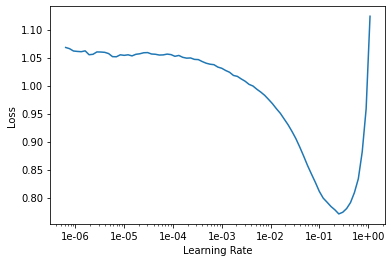

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr= 4e-02)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.589721,0.775721,0.872500,0.668477,00:02
1,0.414024,0.254397,0.906875,0.816529,00:02
2,0.316486,0.176509,0.915000,0.873894,00:02
3,0.249596,0.162237,0.916875,0.880350,00:02


In [ ]:
learn.unfreeze()

In [ ]:
learn.save('stage-1')

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


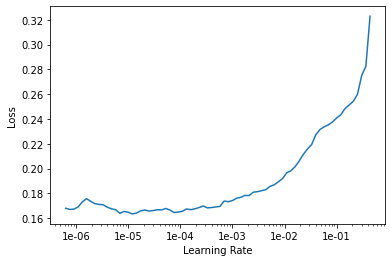

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(6, max_lr= slice(4e-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.171426,0.153913,0.925625,0.888424,00:02
1,0.163811,0.148244,0.929375,0.889483,00:02
2,0.157996,0.148467,0.925000,0.884188,00:02
3,0.157419,0.143057,0.928125,0.877629,00:02
4,0.151060,0.138545,0.932500,0.891379,00:02
5,0.146563,0.140292,0.930000,0.885036,00:02


In [ ]:
learn.show_results()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


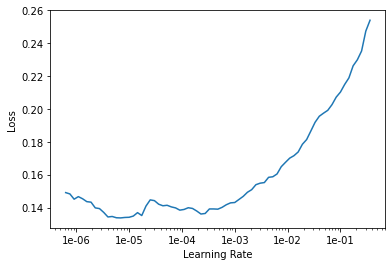

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(3, slice(1e-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.146256,0.140005,0.930625,0.883105,00:02
1,0.143267,0.142291,0.931875,0.892242,00:02
2,0.145448,0.141267,0.931250,0.889880,00:02


In [ ]:
learn.freeze()

In [ ]:
learn.save('stage_2m')

In [ ]:
img = open_image((path/'train').ls()[0])
img.data.shape

torch.Size([3, 256, 256])

In [ ]:
# data = src.transform(tfms, size = 128).databunch(bs = 32).normalize(imagenet_stats)
data_full = src.transform(tfms, size = 256).databunch(bs = 32).normalize(imagenet_stats)

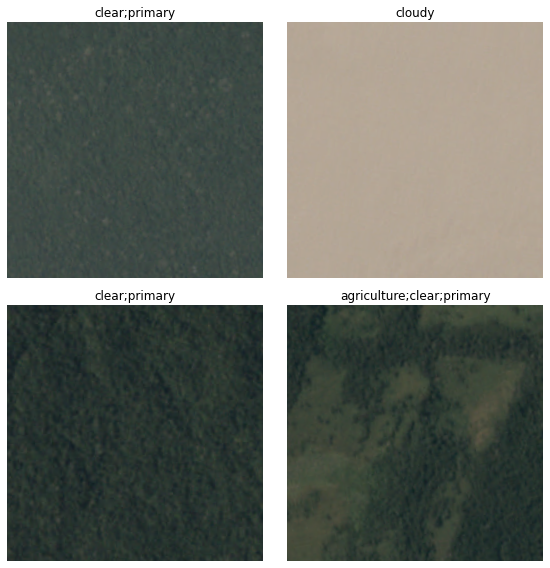

In [ ]:
data_full.show_batch(rows = 2)

In [ ]:
learn.data = data_full

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


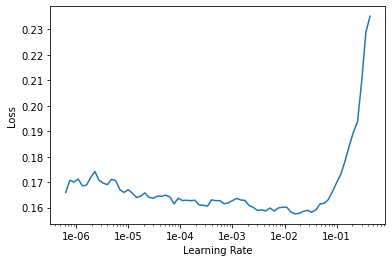

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(4, max_lr = slice(7e-03))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.163866,0.168632,0.923750,0.875709,00:03
1,0.164819,0.150945,0.930000,0.876536,00:03
2,0.158965,0.150618,0.929375,0.880306,00:03
3,0.149639,0.152651,0.927500,0.884620,00:03


In [ ]:
learn.unfreeze()

In [ ]:
learn.save("stage_3")

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


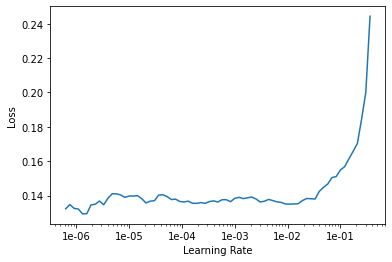

In [ ]:
learn.recorder.plot()

In [ ]:
learn.freeze()

In [ ]:
learn.fit_one_cycle(5, max_lr = 4e-03)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.139190,0.141194,0.928125,0.893968,00:03
1,0.140396,0.142716,0.927500,0.886407,00:03
2,0.136923,0.140179,0.933125,0.884351,00:03
3,0.135657,0.133395,0.933125,0.902747,00:03
4,0.128411,0.133761,0.931875,0.896992,00:03


In [ ]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


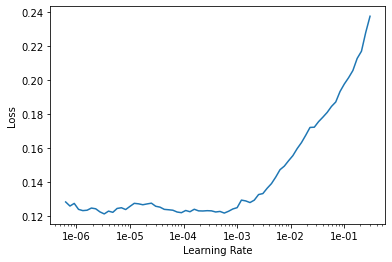

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('stage-4')

In [ ]:
learn.fit_one_cycle(10, max_lr = 1e-04)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.118516,0.131730,0.932500,0.898828,00:03
1,0.118742,0.130539,0.931875,0.894292,00:03
2,0.121831,0.149401,0.926250,0.885013,00:03
3,0.122791,0.135309,0.928125,0.893051,00:03
4,0.122773,0.133258,0.931250,0.888570,00:03
5,0.119360,0.128748,0.927500,0.890983,00:03
6,0.116807,0.126652,0.933750,0.898261,00:03
7,0.111906,0.122526,0.936250,0.906037,00:03
8,0.108855,0.122970,0.935625,0.899403,00:03
9,0.107119,0.121571,0.936250,0.905362,00:03


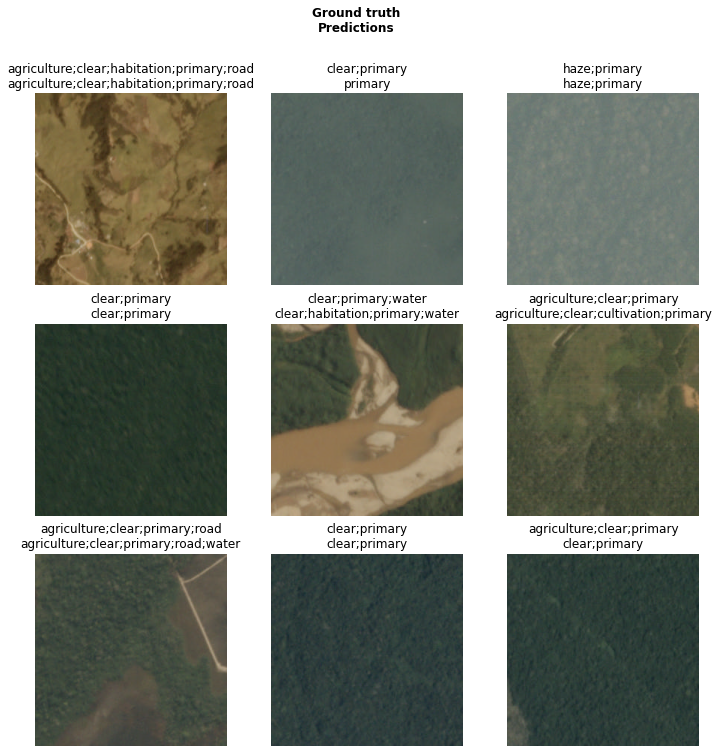

In [ ]:
learn.show_results(rows = 3)

In [2]:
path = untar_data(URLs.CAMVID)

In [50]:
path.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [52]:
(path/'images').ls()[:5]

[PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03960.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08107.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07440.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f01260.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05400.png')]

In [3]:
with open(path/'codes.txt', 'r') as f: 
  y = f.read()

In [4]:
with open(path/'valid.txt', 'r') as f: 
  x = f.read()

In [5]:
valid= x.split('\n')

In [61]:
len(valid)

102

In [79]:
img = open_image((path/'images').ls()[0])

In [64]:
(path/'images').ls()[:4], (path/'labels').ls()[:4]

([PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03960.png'),
  PosixPath('/root/.fastai/data/camvid/images/0016E5_08107.png'),
  PosixPath('/root/.fastai/data/camvid/images/0016E5_07440.png'),
  PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f01260.png')],
 [PosixPath('/root/.fastai/data/camvid/labels/0006R0_f02400_P.png'),
  PosixPath('/root/.fastai/data/camvid/labels/0016E5_06480_P.png'),
  PosixPath('/root/.fastai/data/camvid/labels/0016E5_08127_P.png'),
  PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f00150_P.png')])

In [69]:
(path/'images').ls()[0].stem, (path/'images').ls()[0].suffix

('Seq05VD_f03960', '.png')

In [7]:
def get_label(im_path):
  return path/'labels'/f'{im_path.stem}_P{im_path.suffix}'

In [8]:
mask = open_mask(get_label((path/'images').ls()[0]))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f465599c510>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4655921810>)

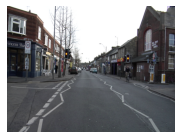

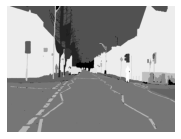

In [81]:
show_image(img), show_image(mask)

In [9]:
codes = y.split('\n')
len(codes)

33

In [10]:
codes = codes[:-1]

In [11]:
for i in range(len(codes)):
  if (codes[i] == 'Void'):
    index = i
    break

In [12]:
index

30

In [13]:
src = SegmentationItemList.from_folder(path/'images').split_by_rand_pct().label_from_func(get_label, classes= codes)

In [15]:
data = src.transform(get_transforms(), tfm_y = True, size = 180).databunch(bs = 4).normalize(imagenet_stats)

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

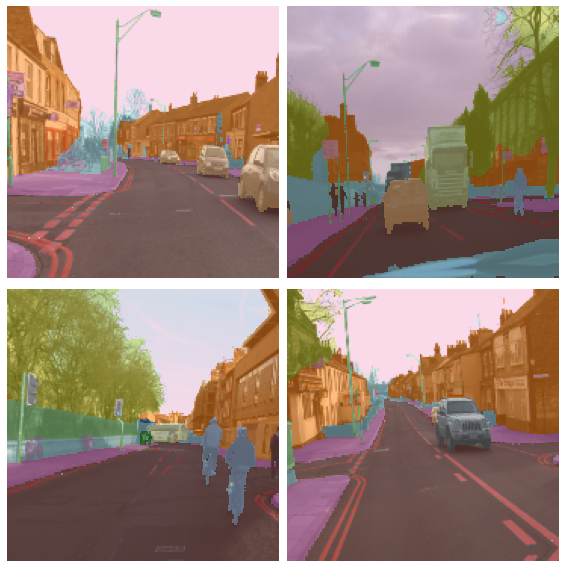

In [16]:
data.show_batch(rows = 2)

In [17]:
learn = unet_learner(data, models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


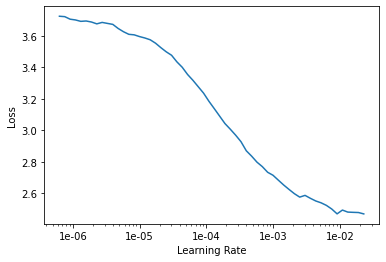

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(4, max_lr = slice(2e-04))

epoch,train_loss,valid_loss,time
0,1.184481,0.822122,00:16
1,0.755683,0.595938,00:16
2,0.604679,0.520874,00:16
3,0.527059,0.486785,00:17


In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


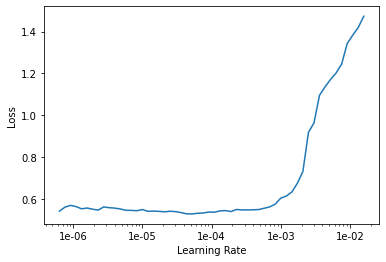

In [23]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, max_lr = slice(2e-04))

epoch,train_loss,valid_loss,time
0,0.571641,0.502059,00:16
1,0.569491,0.476752,00:16
2,0.492956,0.420438,00:16
3,0.455892,0.406027,00:16


In [26]:
learn.unfreeze()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


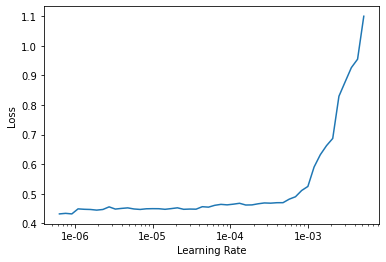

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.save('stage_1')

In [29]:
learn.fit_one_cycle(2, max_lr = slice(1e-04))

epoch,train_loss,valid_loss,time
0,0.461821,0.427166,00:17
1,0.417621,0.391981,00:17


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


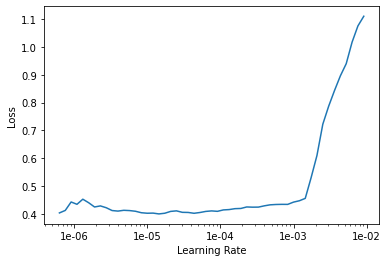

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(8, max_lr = slice(7e-05))

epoch,train_loss,valid_loss,time
0,0.408259,0.390573,00:17
1,0.434604,0.383380,00:17
2,0.431858,0.391228,00:17
3,0.394397,0.366175,00:17
4,0.383558,0.357742,00:17
5,0.377136,0.346251,00:17
6,0.355818,0.339996,00:17
7,0.346560,0.338725,00:17


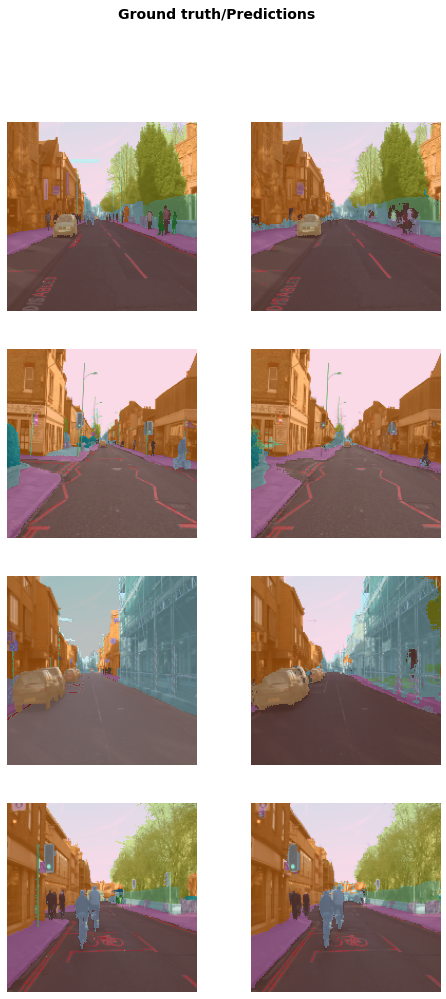

In [32]:
learn.show_results()

In [33]:
learn.save('stage-2')

In [34]:
data = src.transform(get_transforms(), tfm_y = True, size = 360).databunch(bs = 4).normalize(imagenet_stats)

In [35]:
learn.data = data

In [36]:
learn.freeze()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


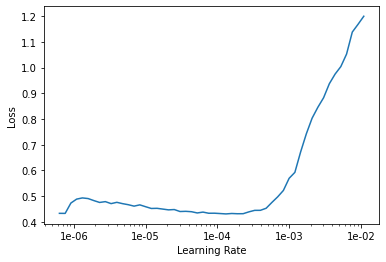

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(6, max_lr = slice(1e-04))

epoch,train_loss,valid_loss,time
0,0.410107,0.366629,00:38
1,0.415041,0.347886,00:38
2,0.371256,0.333537,00:38
3,0.344671,0.305127,00:38
4,0.322057,0.287810,00:38
5,0.302260,0.282390,00:38


In [39]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [40]:
learn.save('stage_3')

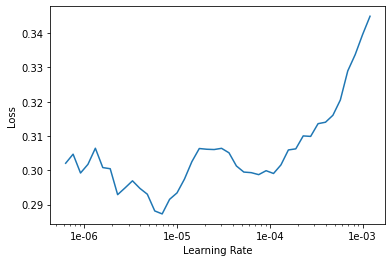

In [41]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(5, max_lr = slice(5e-05))

epoch,train_loss,valid_loss,time
0,0.296041,0.283741,00:38
1,0.304839,0.289589,00:38
2,0.292405,0.264022,00:38
3,0.282303,0.262295,00:38
4,0.284706,0.259503,00:38


In [44]:
learn.unfreeze()
learn.save('stage_3')

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


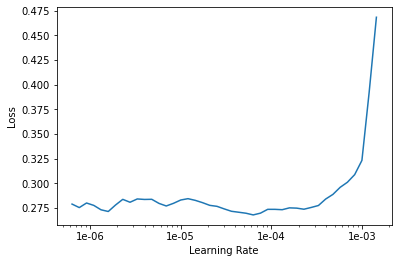

In [45]:
learn.lr_find()
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(6, slice(1e-05, 7e-05))

epoch,train_loss,valid_loss,time
0,0.274023,0.260881,00:40
1,0.300941,0.276031,00:40
2,0.283617,0.273396,00:40
3,0.271275,0.256201,00:40
4,0.250080,0.246108,00:40
5,0.239935,0.242900,00:40


In [47]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


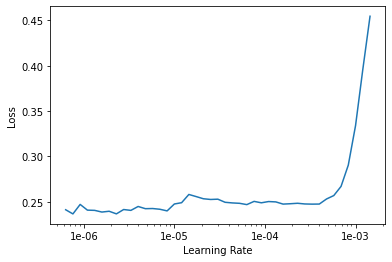

In [48]:
learn.recorder.plot()

In [49]:
learn.fit_one_cycle(6, slice(1e-05))

epoch,train_loss,valid_loss,time
0,0.243086,0.242497,00:40
1,0.246355,0.240802,00:40
2,0.253858,0.239765,00:40
3,0.247814,0.240455,00:40
4,0.236791,0.237754,00:40
5,0.244233,0.236974,00:40


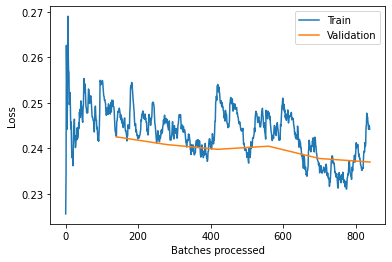

In [50]:
learn.recorder.plot_losses()

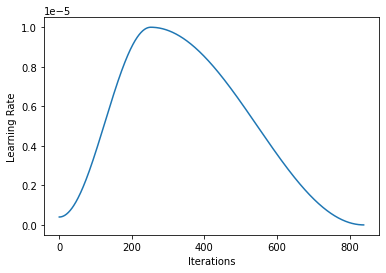

In [51]:
learn.recorder.plot_lr()

In [52]:
learn = learn.to_fp16()

In [53]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


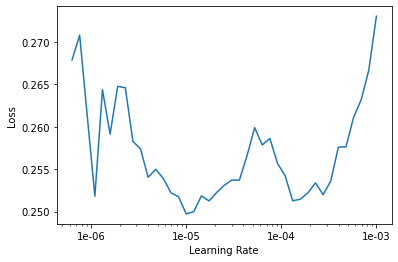

In [55]:
learn.recorder.plot()

In [54]:
learn.save('stage_4')

In [56]:
learn.fit_one_cycle(3, slice(1e-05))

epoch,train_loss,valid_loss,time
0,0.247492,0.237986,00:41
1,0.246701,0.239097,00:41
2,0.227530,0.237593,00:41
